# VISUALIZATION using Statistical method


1. Importing libraries and loading the dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


'''loading haberman's dataset'''

hb=pd.read_csv(r'C:\Users\SAMPREET_03\Desktop\Applied Course\assignment questions\Question 2\haberman.csv')

2. Statistics and Gist of the dataset.

In [ ]:
hb.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
print(hb.shape)

(306, 4)


In [ ]:
print (hb.columns)


Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
print(hb)


     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [ ]:
hb['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Note : Given dataset is imbalanced.

In [ ]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
hb.describe()


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


3. Objective : To determine a woman who has been operated for the breast cancer will survive for more than five years or not.

4. Given : - 'age' = age of the women.
           - 'nodes' = no. of axiliary nodes for the cancer.
           - 'year' = year in which she was operated.
           - 'status'= if (1) survived for more than 5 years after operation, if (2) died within 5  years after being operated.

# Univariate analysis :


1. plotting PDFs for different data_points and noting down our observations.

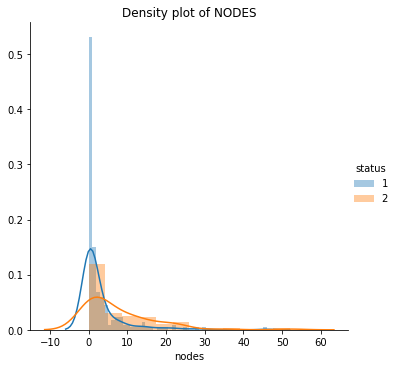

In [ ]:
f= sns.FacetGrid(hb, hue='status',height=5)
f.map(sns.distplot,'nodes')
f.add_legend();
plt.title('Density plot of NODES')
plt.show()


Observations:
(1) women having nodes less than 2 are more likely to survive for longer than 5 years after being operated.
(2) women having nodes greater than 15 are less likely to survive for more than 5 years after an operation.


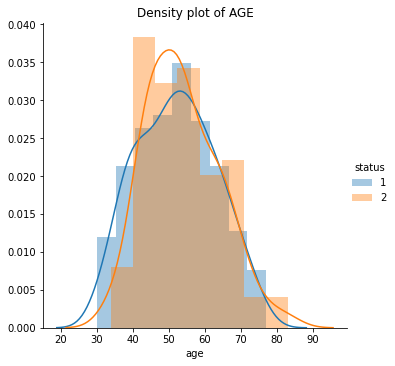

In [ ]:
f= sns.FacetGrid(hb, hue='status',height=5)
f.map(sns.distplot,'age')
f.add_legend();
plt.title('Density plot of AGE')
plt.show()

Observation :
(1) Plots are overlapping, it means that women's age can't be considered an crucial parameter for deciding whether she will survive for more than 5 years after being operated or not.
(2) However, one thing can be concluded that women having less age i.e 30-40 years, is more likely to have an successful opeartion.(she will survive for more than 5 years).
(3) women having age greater than 75 are more likely to die within 5 years after being operated for cancer.

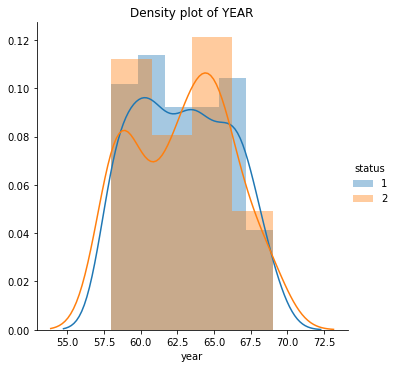

In [ ]:
f= sns.FacetGrid(hb, hue='status',height=5)
f.map(sns.distplot,'year')
f.add_legend();
plt.title('Density plot of YEAR')
plt.show()

Observations :
(1) Majority of the graph is overlapping, it shows that the chances of survival of a women after operation is irrespective of the year in which she was opearted.

    

2. CDFs

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
#############################################################################
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


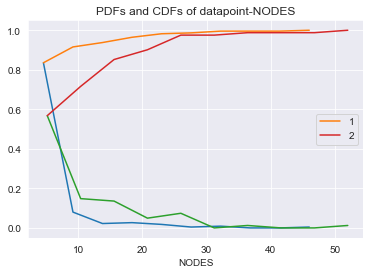

In [ ]:
sns.set_style('darkgrid')
n1=list(hb[hb['status']==1]['nodes'])
counts1,bin_edges=np.histogram(n1,bins=10,density=True)
#print(counts1)
print(bin_edges)
pdf1=counts1/sum(counts1)
print(pdf1)
cdf1=np.cumsum(pdf1)
print(cdf1)
plt.plot(bin_edges[1:],pdf1)
plt.plot(bin_edges[1:],cdf1,label='1')
plt.xlabel('NODES')


print('#############################################################################')
n2=list(hb[hb['status']==2]['nodes'])
counts2,bin_edges2=np.histogram(n2,bins=10,density=True)
#print(counts2)
print(bin_edges2)
pdf2=counts2/sum(counts2)
print(pdf2)
cdf2=np.cumsum(pdf2)
print(cdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2,label='2')
plt.xlabel('NODES')

plt.title('PDFs and CDFs of datapoint-NODES')
plt.legend()
plt.show()

Observations :
(1) 83.55% of the women who have survived for more than 5 years after being operated have nodes less than 4.6.
(2) Women who had nodes greater than 46 are not likely to survive for more than 5 years.
(3) Having lesser nodes doesn'e guarantee the survival of the patient.

[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
#############################################################################
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


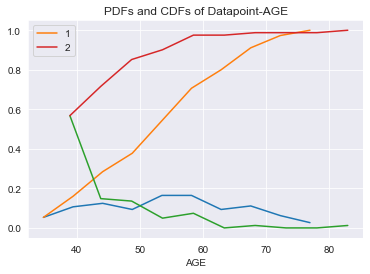

In [ ]:
n1=list(hb[hb['status']==1]['age'])
counts1,bin_edges=np.histogram(n1,bins=10,density=True)
#print(counts1)
print(bin_edges)
pdf1=counts1/sum(counts1)
print(pdf1)
cdf1=np.cumsum(pdf1)
print(cdf1)
plt.plot(bin_edges[1:],pdf1)
plt.plot(bin_edges[1:],cdf1,label='1')
plt.xlabel('AGE')

print('#############################################################################')
n2=list(hb[hb['status']==2]['age'])
counts2,bin_edges2=np.histogram(n2,bins=10,density=True)
#print(counts2)
print(bin_edges2)
pdf1=counts2/sum(counts2)
print(pdf2)
cdf2=np.cumsum(pdf2)
print(cdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2,label='2')
plt.xlabel('AGE')

plt.title('PDFs and CDFs of Datapoint-AGE')
plt.legend()
plt.show()

Observations :
(1) 5.6% of the patients having age between 30 and 34 have successfully survived for more than 5 years after being operated.
(2) Patients having age greater than 77.0% were not able to survive for long.

3. Performing univariate analysis with BOX PLOT AND WHISKERS.


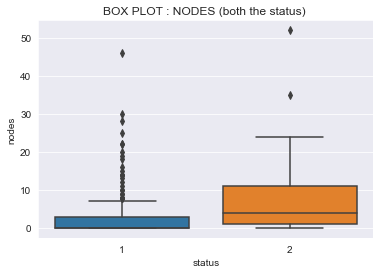

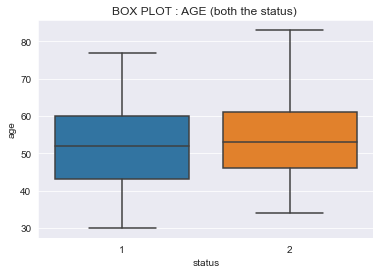

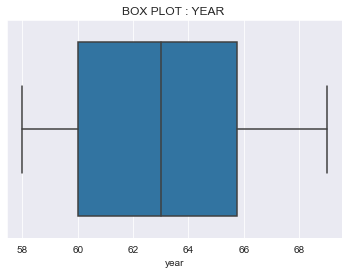

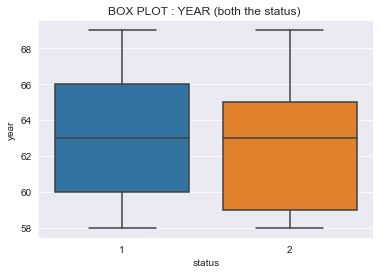

In [ ]:
sns.boxplot(x='status',y='nodes',data=hb)
plt.title('BOX PLOT : NODES (both the status) ')
plt.show()
sns.boxplot(x='status',y='age',data=hb)
plt.title('BOX PLOT : AGE (both the status) ')
plt.show()
sns.boxplot(x='year',data=hb)
plt.title('BOX PLOT : YEAR ')
plt.show()
sns.boxplot(x='status',y='year',data=hb)
plt.title('BOX PLOT : YEAR (both the status) ')
plt.show()

4. VIOLIN PLOTS

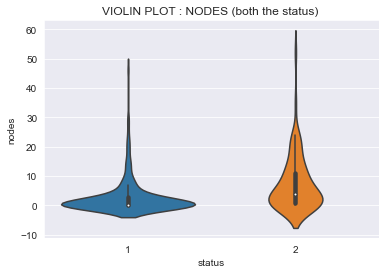

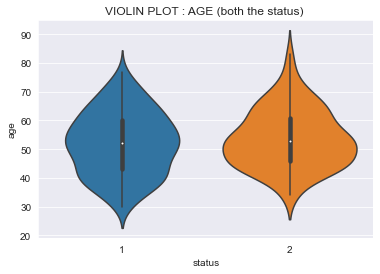

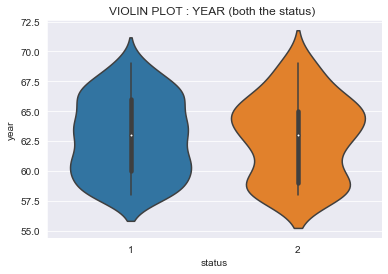

In [ ]:
sns.violinplot(x='status',y='nodes',data=hb)
plt.title('VIOLIN PLOT : NODES (both the status) ')
plt.show()
sns.violinplot(x='status',y='age',data=hb)
plt.title('VIOLIN PLOT : AGE (both the status) ')
plt.show()
sns.violinplot(x='status',y='year',data=hb)
plt.title('VIOLIN PLOT : YEAR (both the status) ')
plt.show()

Observations:
(1) Around 50% of the survived patients had nodes approximately equal to 0.
(2) Around 75% of the patients who did do not survived for more than 5 years after being operated had nodes between 1 to 10.
(3) Having higher age (>75), patients are less likely to survive after operation.
(4) Majority of the opeartions took place before 1966.
(5) The box plots and violin plots of age and year results in substatntial overlapping of datapoints.However, the box plot and violin plot of the nodes have less overlapping which gives us an indication that nodes can be a paramater which can be used to differentiate the patients who lived for more than 5 years after operation and who did not. But still, it can't provide us the required threshold as there is some overlapping in it also.

 # Bivariate analysis

1. Scatter plots :

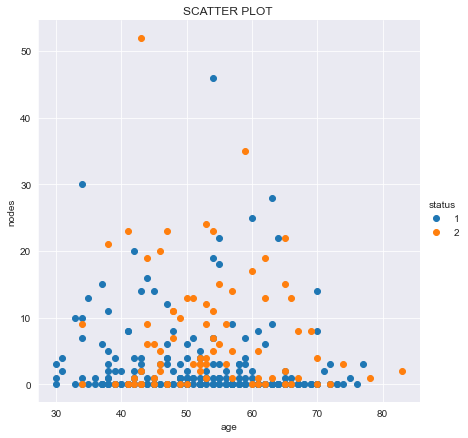

In [ ]:
sns.set_style("darkgrid");
g=sns.FacetGrid(hb, hue="status", height=6)
g.map(plt.scatter, "age", "nodes")
g.add_legend();
plt.title('SCATTER PLOT ')
plt.show();

Observations:
(1) Women having age between 30 & 40 and who have less than 20 nodes have survived for more than 5 years after their opeartion.
(2) Women having their age between 40 & 50 have equal chances of survival for more than 5 years after being operated, irrespective of the no. of nodes present.
(3) There are less patients who have node more than 25.
(4) Women having age more than 50 as well as nodes having more than 10 are less likely to survive.


2. PAIR-PLOTS

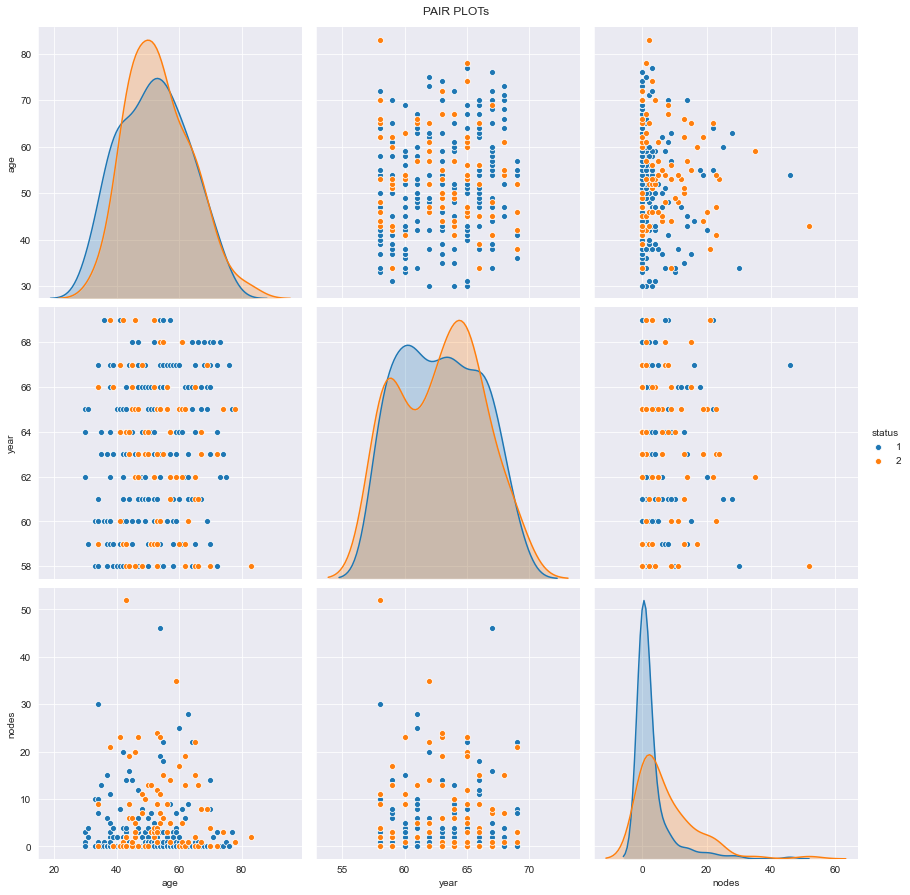

In [ ]:

sns.pairplot(hb,hue='status',height=4)
plt.suptitle('PAIR PLOTs',y=1.02)
plt.show()


Observation:
(1) The plot between age and year reveals that in each year women of all the ages have been operated with one or two exceptions.
(2) Across the span of 10 years, majority of the patients who have been operated have nodes less than 20.(plot b/w years and nodes)
(3) The plot between age and nodes helps us the most to predict the survival of the patient for more than 5 years after being operated


# Conclusions:


(1) women having age less than 40 are more likely to survive for more than 5 years after being operated. However, less age doesn't guarantee for survival.
(2) Age and year,alone, are not a good parameter to predict the chances of survival.
(3) Having very less nodes doesn't mean that the patient is more likely to survive. HOwever, almost all the patients whose age was less than 35 and nodes less than 10 have survived for more than 5 years after being operated.
(4) All the above stated observations indicate that, based on the given datapoints, to predict the survival chances of the patients is a dificult task as the dataset is imbalanced.